# Panama Apartments Pricing | Data Preprosecing Notebook
In this notebook we perform the following:
- data cleaning: 
    - treatment of missing values
    - treatement of outliers
- Exploratory Data Analysis (EDA):
    - identify highly correlated features (multicolinearity)
    - identify the trends in the data
    - interpretatation of data (does it make sense)
- Data Normalization
    - evaluate possibles tranformation of target and feature variables if needed

In [48]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Data Input

In [12]:
df = pd.read_csv("data/data.csv")

**Note**: Excel is more convenient for coorecting the add_**price column**. Therefore prior to this cleaning. I used excel to remove **'B/.'**, and reduced percentages in the price columns

In [13]:
df

,add_title,add_price,add_area_val,add_bed_val,add_bath_val,add_park_val,Unnamed: 6
0,"Panama Viejo Residences, en Panama Viejo",139000.00000,58.00000,2,2.00000,1,139000
1,Armonía en Cinta Costera,124500.00000,45.24000,1,1.00000,NaN,124500
2,"Coco Place en Coco del Mar, San Francisco",233259.60000,79.34000,2,2.00000,1,233259.6
3,Apartments in El Cangrejo | El Cangrejo Porto ...,145000.00000,92.00000,2,2.00000,1,145000
4,Apartments in El Bosque | El Bosque Alsacia To...,118000.00000,66.00000,2,2.00000,1,118000
...,...,...,...,...,...,...,...
9823,Apartments in Santa María | Edificio Único en ...,305000.00000,96.00000,2,2.50000,2,305000
9824,The Regent Costa del Este venta,380000.00000,95.00000,2,2.00000,NaN,380000
9825,Apartments in Coco del Mar | Para Inversionist...,274000.00000,79.00000,2,2.00000,2,274000
9826,Apartments in San Francisco | Sale of reposses...,200000.00000,124.00000,3,2.50000,2,200000


## Data Cleaning
### Replace non-alphanumeric values

In [14]:
# replace non-alphanumeric values on titles add
for i in range(len(df["add_title"])):
    df["add_title"][i] = re.sub(r'[^a-zA-Z0-9]', '_', df["add_title"][i])

c:\users\a-gue\onedrive\documentos\python_projects\panama_apt_pricing\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df.head()

,add_title,add_price,add_area_val,add_bed_val,add_bath_val,add_park_val,Unnamed: 6
0,Panama_Viejo_Residences__en_Panama_Viejo,139000.00000,58.00000,2,2.00000,1,139000
1,Armon_a_en_Cinta_Costera,124500.00000,45.24000,1,1.00000,NaN,124500
2,Coco_Place_en_Coco_del_Mar__San_Francisco,233259.60000,79.34000,2,2.00000,1,233259.6
3,Apartments_in_El_Cangrejo___El_Cangrejo_Porto_...,145000.00000,92.00000,2,2.00000,1,145000
4,Apartments_in_El_Bosque___El_Bosque_Alsacia_To...,118000.00000,66.00000,2,2.00000,1,118000


### Find Missing Values

In [17]:
df.isna().sum()

add_title         0
add_price        13
add_area_val     57
add_bed_val       0
add_bath_val      0
add_park_val    222
Unnamed: 6       13
dtype: int64

In [21]:
# we will drop all rows where at least one value is missing
df.dropna(inplace=True)

In [22]:
df.describe()

,add_price,add_area_val,add_bed_val,add_bath_val
count,9548.00000,9548.00000,9548.00000,9548.00000
mean,610396.27794,232.09317,2.61793,2.68192
std,13842682.59130,1586.32815,0.78601,0.99528
min,0.01000,0.12000,1.00000,1.00000
25%,180000.00000,97.00000,2.00000,2.00000
50%,285000.00000,148.00000,3.00000,2.50000
75%,480000.00000,236.63000,3.00000,3.50000
max,1100000000.00000,131732.00000,8.00000,10.00000


There seem to be outliers in the data in price, and the area features. We will filter those *outliers*. 
The exclusion of such outliers seem to be because of:
- typo errors in the add,
- special cases like people posting rentals instead of selling price, etc. 

### Outliers

In [38]:
# filter the outliers shown above, after some iterations the values below (for flitering) seem more realistic
df=df.loc[(df['add_price'] < 6000000.00000) & (df['add_price'] > 40000) & (df['add_area_val'] < 1000.00000) & (df['add_area_val'] > 20) & (df['add_bath_val'] < 10)]
df.describe()

,add_price,add_area_val,add_bed_val,add_bath_val
count,9415.00000,9415.00000,9415.00000,9415.00000
mean,402712.46429,187.71710,2.61455,2.67472
std,361694.10605,130.33656,0.78304,0.98246
min,41000.00000,33.00000,1.00000,1.00000
25%,180100.00000,97.00000,2.00000,2.00000
50%,285000.00000,147.00000,3.00000,2.50000
75%,480000.00000,235.00000,3.00000,3.50000
max,4998000.00000,940.00000,8.00000,8.00000


### Types
To eval in case of values that are not read as numbers

In [80]:
df.dtypes

add_title        object
add_price       float64
add_area_val    float64
add_bed_val       int64
add_bath_val    float64
add_park_val     object
Unnamed: 6       object
dtype: object

Some examples in feature 'parkings' have 'More' as value. Here' we will exclude those values

In [85]:
df=df.loc[(df['add_park_val'] != 'More')]
df.head()

,add_title,add_price,add_area_val,add_bed_val,add_bath_val,add_park_val,Unnamed: 6
0,Panama_Viejo_Residences__en_Panama_Viejo,139000.00000,58.00000,2,2.00000,1,139000
2,Coco_Place_en_Coco_del_Mar__San_Francisco,233259.60000,79.34000,2,2.00000,1,233259.6
3,Apartments_in_El_Cangrejo___El_Cangrejo_Porto_...,145000.00000,92.00000,2,2.00000,1,145000
4,Apartments_in_El_Bosque___El_Bosque_Alsacia_To...,118000.00000,66.00000,2,2.00000,1,118000
5,Apartments_in_Carrasquilla___Torres_de_Castill...,125000.00000,71.00000,2,2.00000,1,"125,000.00"


In [88]:
df['add_park_val'] = df.add_park_val.astype(int)
df.dtypes

add_title        object
add_price       float64
add_area_val    float64
add_bed_val       int64
add_bath_val    float64
add_park_val      int32
Unnamed: 6       object
dtype: object

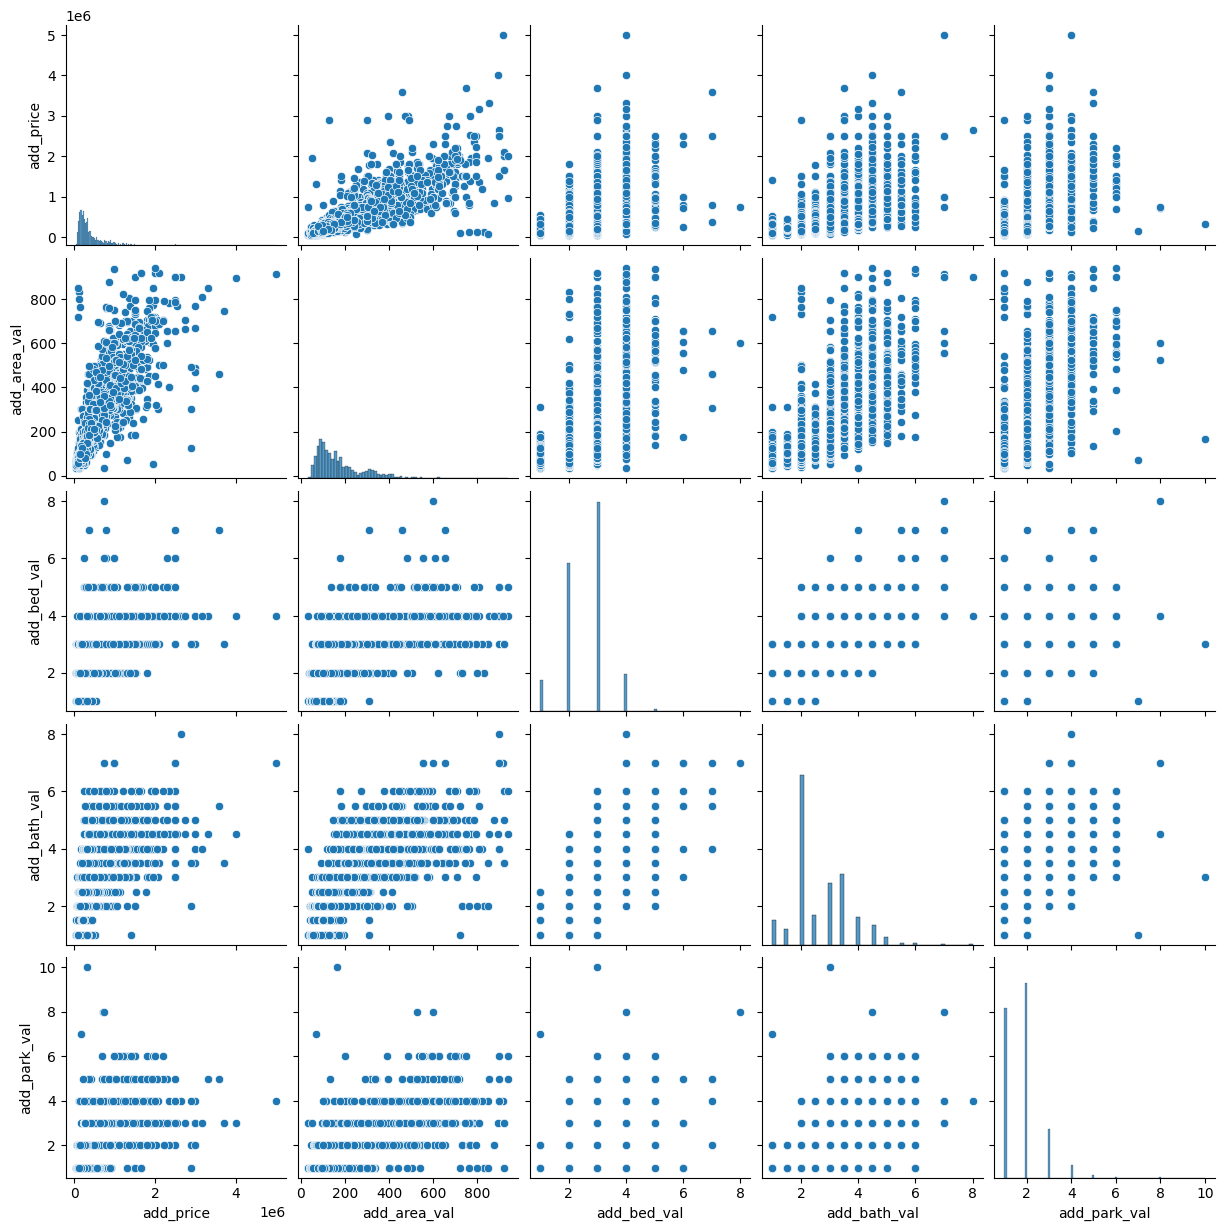

In [89]:
sns.pairplot(df,)

The data seems realistic with increase in price with respect to features like price, area, number of rooms, parking, and baths

### Save Clean Data

In [90]:
df.head()

,add_title,add_price,add_area_val,add_bed_val,add_bath_val,add_park_val,Unnamed: 6
0,Panama_Viejo_Residences__en_Panama_Viejo,139000.00000,58.00000,2,2.00000,1,139000
2,Coco_Place_en_Coco_del_Mar__San_Francisco,233259.60000,79.34000,2,2.00000,1,233259.6
3,Apartments_in_El_Cangrejo___El_Cangrejo_Porto_...,145000.00000,92.00000,2,2.00000,1,145000
4,Apartments_in_El_Bosque___El_Bosque_Alsacia_To...,118000.00000,66.00000,2,2.00000,1,118000
5,Apartments_in_Carrasquilla___Torres_de_Castill...,125000.00000,71.00000,2,2.00000,1,"125,000.00"


In [91]:
# remove columns that have no use for prediction models, and rename colums
df_clean= df.drop(['add_title', 'Unnamed: 6'], axis=1).set_axis(['price', 'area', 'beds', 'baths', 'parkings'], axis=1, inplace=False)
df_clean.to_csv('data_cl_1.csv', index=False)

## EDA

### Correlation 

c:\users\a-gue\onedrive\documentos\python_projects\panama_apt_pricing\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

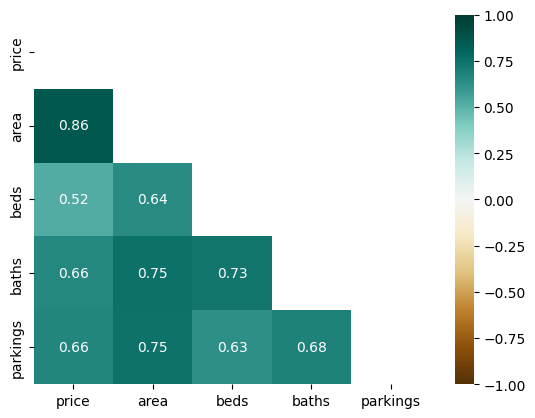

In [96]:
mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
sns.heatmap(df_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')